In [302]:
"""
It consists of scraping the following information from IMDB adventures movies:

Movie name
Description
Release Date
Director Name
Rating
Duration
Genre
Stars (Actors)
Filming Dates
"""

'\nIt consists of scraping the following information from IMDB adventures movies:\n\nMovie name\nDescription\nRelease Date\nDirector Name\nRating\nDuration\nGenre\nStars (Actors)\nFilming Dates\n'

In [303]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [304]:
# requests used to get the URL
#path = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&start=51&ref_=adv_nxt"

# the above is normal url, but we want from 1 to 100 movies, so we want to change the number (start = 100)
path = f'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&start=51&ref_=adv_nxt'
data = requests.get(path)
print(data)

<Response [200]>


In [305]:
soup = BeautifulSoup(data.content, "html.parser")

In [318]:
# extract movie name

movie_name = []
imdb_movie_name = soup.find_all('h3', class_ ='lister-item-header')  
for movie in imdb_movie_name:
    movie_name.append(movie.a.text)     # a used to remove the numbers
#print(movie_name)

len(movie_name)

50

In [337]:
# extract movie runtime

movie_runtime = []
imdb_movie_runtime = soup.find_all('span', class_ ='runtime')           
for runtime in imdb_movie_runtime:
  movie_runtime.append(runtime.text)
print(movie_runtime[:5])

len(movie_runtime)

['131 min', '201 min', '123 min', '129 min', '89 min']


50

In [320]:
# extract movie genre

movie_genre = []
imdb_movie_genre = soup.find_all('span', class_ ='genre')           
for genre in imdb_movie_genre:
  movie_genre.append(genre.text.replace("\n", "").strip())
#print(movie_genre)

len(movie_genre)

50

In [321]:
# extract movie rating

movie_rating = []
imdb_movie_rating = soup.find_all('div', class_ ='inline-block ratings-imdb-rating')           
for rating in imdb_movie_rating:
  rating1 = float(rating.text.replace("\n", ""))
  movie_rating.append(rating1)
print(movie_rating)

len(movie_rating)

[7.7, 9.0, 5.9, 7.4, 8.1, 7.3, 7.6, 7.3, 4.9, 7.9, 6.1, 8.5, 6.7, 8.1, 6.5, 7.5, 6.8, 7.9, 7.3, 6.6, 7.4, 6.7, 8.0, 8.6, 6.5, 7.7, 7.4, 7.0, 7.8, 8.1, 7.4, 6.6, 7.7, 7.6, 6.7, 7.1, 6.9, 7.9, 6.7, 7.3, 8.5, 7.6, 7.6, 6.0, 6.9, 7.7, 7.1, 7.5, 6.3, 6.8]


50

In [350]:
# extract movie description
movie_desc = []

# 'div' is the mother for the 'p'
# we want to take mother because we are having two 'p' child
# so only we are using [1] that means second element
# to take the second child 'p'

imdb_movie_desc = soup.find_all('div', class_ ='lister-item-content')  

for description in imdb_movie_desc:
  p_tags = description.find_all('p', class_='text-muted')
  desc = p_tags[1].text
  movie_desc.append(desc.replace('\n', ""))

print(movie_desc[:2])

len(movie_desc)

["In the 1960s, superpowered humans Charles Xavier and Erik Lensherr work together to find others like them, but Erik's vengeful pursuit of an ambitious mutant who ruined his life causes a schism to divide them.", "Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring."]


50

In [322]:
# extract release year

movie_year = []
imdb_movie_year = soup.find_all('span', class_ ='lister-item-year')           
for release_year in imdb_movie_year:
  year = int(release_year.text.replace("(", "").replace(")", "").replace("I", ""))
  movie_year.append(year)
print(movie_year)

len(movie_year)

[2011, 2003, 2016, 2019, 1986, 2021, 2007, 2018, 2019, 2017, 2017, 2000, 2018, 2003, 2019, 2021, 2019, 2001, 2015, 2021, 2018, 2014, 1987, 1985, 1999, 2005, 2017, 2012, 2016, 2014, 2017, 2021, 1997, 2016, 1956, 2017, 2017, 2008, 2019, 2017, 1994, 2005, 2014, 2020, 2011, 2021, 1999, 2016, 2007, 1991]


50

In [323]:
# extract movie director

movie_dir = []
imdb_movie_dir = soup.find_all('p', class_ ='')  

# [0] is first index or first element 1
# [1] is second index or second element 2
# to extract the director name from the actor we are using this method
         
for director in imdb_movie_dir:
  
  #movie_dir.append(director.text.replace("\n", "").split('|'))
#print(movie_dir[:5])
  #movie_dir.append(director.text.replace("\n", "").split('|')[0])
#print(movie_dir[:5])
   #movie_dir.append(director.text.replace("\n", "").split('|')[0].split(':'))
#print(movie_dir[:5])
    movie_dir.append(director.text.replace("\n", "").split('|')[0].split(':')[1])
print(movie_dir[:5])


len(movie_dir)

['Matthew Vaughn', 'Peter Jackson', 'David Ayer', 'Jon Watts', 'Rob Reiner']


50

In [336]:
# extract actor

movie_actor = []
imdb_movie_actor = soup.find_all('p', class_ ='') 

# we want stars, so we remove others
for actor in imdb_movie_actor:
  movie_actor.append(actor.text.replace('\n', "").split('Stars:')[1])
print(movie_actor[:3])

len(movie_actor)

['James McAvoy, Michael Fassbender, Jennifer Lawrence, Kevin Bacon', 'Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom', 'Will Smith, Jared Leto, Margot Robbie, Viola Davis']


50

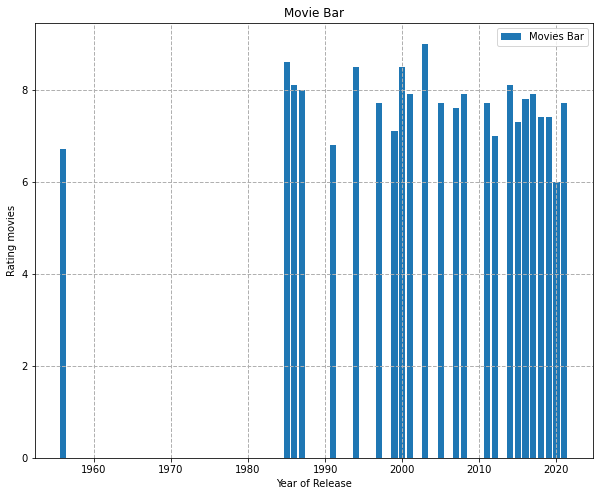

In [325]:
# visualizations

plt.figure(figsize=(10, 8))
plt.bar(movie_year, movie_rating, label = 'Movies Bar')
plt.xlabel('Year of Release')
plt.ylabel('Rating movies')
plt.title('Movie Bar')
plt.legend()
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()


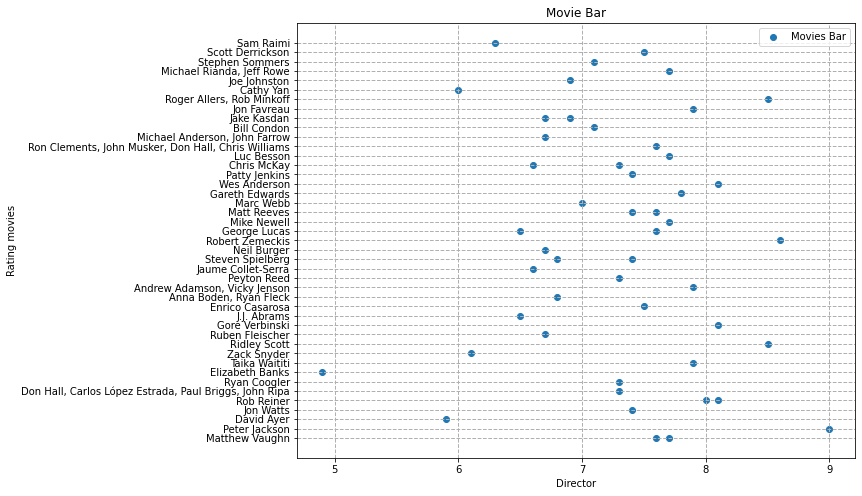

In [344]:
plt.figure(figsize=(10, 8))
plt.scatter(movie_rating, movie_dir, label = 'Movies Bar')
plt.xlabel('Director')
plt.ylabel('Rating movies')
plt.title('Movie Bar')
plt.legend()
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()


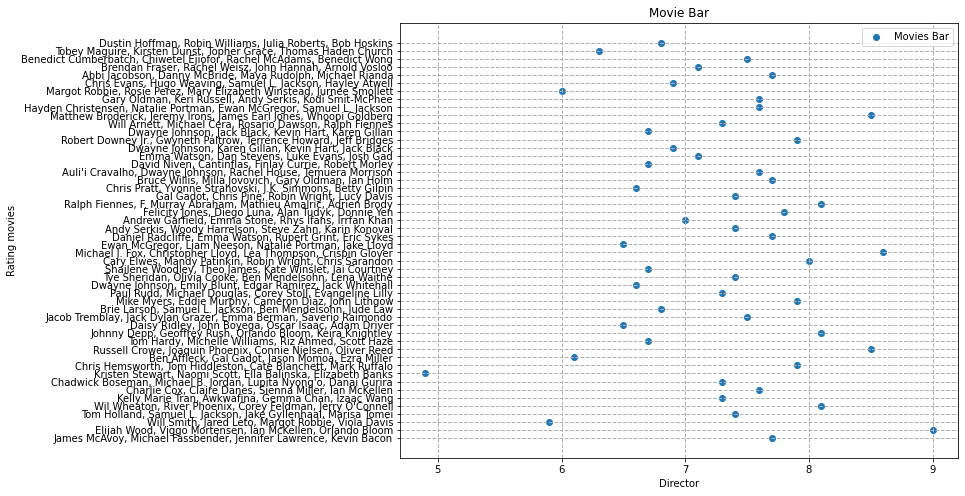

In [345]:
plt.figure(figsize=(10, 8))
plt.scatter(movie_rating, movie_actor, label = 'Movies Bar')
plt.xlabel('Director')
plt.ylabel('Rating movies')
plt.title('Movie Bar')
plt.legend()
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()

In [326]:
# converted movie duration into int

converted_duration = []
for i in movie_runtime:
    duration = int(i.replace('min', ""))
    converted_duration.append(duration)
print(converted_duration)

[131, 201, 123, 129, 89, 107, 127, 134, 118, 130, 120, 155, 112, 143, 141, 95, 123, 90, 117, 127, 140, 139, 98, 116, 136, 157, 140, 136, 133, 99, 141, 138, 126, 107, 167, 129, 119, 126, 123, 104, 88, 140, 130, 109, 124, 113, 124, 115, 139, 142]


In [327]:
# normalized value

df = pd.DataFrame({
               'Rating': movie_rating,
               'Duration': converted_duration
              })
normalized_df = (df - df.min()) / (df.max() - df.min())
print(normalized_df)


      Rating  Duration
0   0.682927  0.380531
1   1.000000  1.000000
2   0.243902  0.309735
3   0.609756  0.362832
4   0.780488  0.008850
5   0.585366  0.168142
6   0.658537  0.345133
7   0.585366  0.407080
8   0.000000  0.265487
9   0.731707  0.371681
10  0.292683  0.283186
11  0.878049  0.592920
12  0.439024  0.212389
13  0.780488  0.486726
14  0.390244  0.469027
15  0.634146  0.061947
16  0.463415  0.309735
17  0.731707  0.017699
18  0.585366  0.256637
19  0.414634  0.345133
20  0.609756  0.460177
21  0.439024  0.451327
22  0.756098  0.088496
23  0.902439  0.247788
24  0.390244  0.424779
25  0.682927  0.610619
26  0.609756  0.460177
27  0.512195  0.424779
28  0.707317  0.398230
29  0.780488  0.097345
30  0.609756  0.469027
31  0.414634  0.442478
32  0.682927  0.336283
33  0.658537  0.168142
34  0.439024  0.699115
35  0.536585  0.362832
36  0.487805  0.274336
37  0.731707  0.336283
38  0.439024  0.309735
39  0.585366  0.141593
40  0.878049  0.000000
41  0.658537  0.460177
42  0.65853

In [351]:
# join scraped data into a dataframe

imdb_movie = pd.DataFrame({ 'Movie Name' : movie_name,
               'Yaer of Release': movie_year,
                'Duration': movie_runtime,
                'Genre': movie_genre,
                'Rating': movie_rating,
                'Actor': movie_actor,
                'Director': movie_dir,
                'Description': movie_desc
                 })

imdb_movie

,Movie Name,Yaer of Release,Duration,Genre,Rating,Actor,Director,Description
0,X-Men: Erste Entscheidung,2011,131 min,"Action, Adventure, Sci-Fi",7.7,"James McAvoy, Michael Fassbender, Jennifer Law...",Matthew Vaughn,"In the 1960s, superpowered humans Charles Xavi..."
1,Der Herr der Ringe: Die Rückkehr des Königs,2003,201 min,"Action, Adventure, Drama",9.0,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson,Gandalf and Aragorn lead the World of Men agai...
2,Suicide Squad,2016,123 min,"Action, Adventure, Fantasy",5.9,"Will Smith, Jared Leto, Margot Robbie, Viola D...",David Ayer,A secret government agency recruits some of th...
3,Spider-Man: Far from Home,2019,129 min,"Action, Adventure, Sci-Fi",7.4,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",Jon Watts,Following the events of Avengers: Endgame (201...
4,Stand by Me: Das Geheimnis eines Sommers,1986,89 min,"Adventure, Drama",8.1,"Wil Wheaton, River Phoenix, Corey Feldman, Jer...",Rob Reiner,"After the death of one of his friends, a write..."
5,Raya und der letzte Drache,2021,107 min,"Animation, Action, Adventure",7.3,"Kelly Marie Tran, Awkwafina, Gemma Chan, Izaac...","Don Hall, Carlos López Estrada, Paul Briggs, J...","In a realm known as Kumandra, a re-imagined Ea..."
6,Der Sternwanderer,2007,127 min,"Adventure, Family, Fantasy",7.6,"Charlie Cox, Claire Danes, Sienna Miller, Ian ...",Matthew Vaughn,In a countryside town bordering on a magical l...
7,Black Panther,2018,134 min,"Action, Adventure, Sci-Fi",7.3,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Ryan Coogler,"T'Challa, heir to the hidden but advanced king..."
8,3 Engel für Charlie,2019,118 min,"Action, Adventure, Comedy",4.9,"Kristen Stewart, Naomi Scott, Ella Balinska, E...",Elizabeth Banks,When a young systems engineer blows the whistl...
9,Thor: Tag der Entscheidung,2017,130 min,"Action, Adventure, Comedy",7.9,"Chris Hemsworth, Tom Hiddleston, Cate Blanchet...",Taika Waititi,"Imprisoned on the planet Sakaar, Thor must rac..."
